
# Tabu Search

### IAA

Selected Athletes:
['jade carey' 'jordan chiles' 'shilese jones' 'simone biles']
Total Score:
171.33725


### Apparatus

Selected Athletes:
['jade carey' 'konnor mcclain' 'shilese jones' 'simone biles']
Total Score:
170.79811666666666


#  Variable Neighborhood Search (VNS):


### IAA

Selected Athletes:
['shilese jones' 'simone biles' 'jordan chiles' 'jade carey']
Total Score:
171.47074999999998

### Apparatus

Selected Athletes:
['simone biles' 'leanne wong' 'konnor mcclain' 'kayla dicello']
Total Score:
166.038475


# Hyper-Heuristics

### IAA

Best Selection: ['skye blakely' 'jade carey' 'shilese jones' 'simone biles']
Best Score: 169.963


### Apparatus

Best Selection: ['christiane popovich' 'ashlee sullivan' 'shilese jones' 'simone biles']
Best Score: 166.26328333333333



# Brute Force

### IAA

Selected Athletes:
['jade carey', 'jordan chiles', 'shilese jones', 'simone biles']
Maximum Score:
169.96300000000002

### Apparatus

Selected Athletes:
['addison fatta', 'jade carey', 'shilese jones', 'simone biles']
Maximum Score:
169.12011666666666


# Mixed-Integer Linear Programming (MILP) 

### IAA
Selected Gymnasts:
jade carey
jordan chiles
shilese jones
simone biles

### Apparatus
Selected Gymnasts:
camryn richardson
chloe cho
emjae frazier
simone biles

---

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [42]:
# Updated data without brute-force search
new_data = {
    'Algorithm': ['Tabu Search', 'Tabu Search', 'Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)', 'Hyper-Heuristics', 'Hyper-Heuristics', 'brute force', 'brute force', 'Stochastic control', 'Stochastic control'],
    'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
    'Total Score': [171.33725, 170.79811666666666, 171.47074999999998, 166.038475, 169.963, 166.26328333333333, 169.96300000000002, 169.12011666666666, 156.9955, 141.70375],
    'Selected Athletes': [
        ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'],
        ['jade carey', 'konnor mcclain', 'shilese jones', 'simone biles'],
        ['shilese jones', 'simone biles', 'jordan chiles', 'jade carey'],
        ['simone biles', 'leanne wong', 'konnor mcclain', 'kayla dicello'],
        ['skye blakely', 'jade carey', 'shilese jones', 'simone biles'],
        ['christiane popovich', 'ashlee sullivan', 'shilese jones', 'simone biles'],
        ['jade carey', 'jordan chiles', 'shilese jones', 'simone biles'],
        ['addison fatta', 'jade carey', 'shilese jones', 'simone biles'],
        ['jade carey', 'jordan chiles', 'joscelyn roberson', 'simone biles'],
        ['addison fatta', 'annalisa milton', 'chloe cho', 'kelise woolford']
    ]
}

# Create DataFrame
result_df = pd.DataFrame(new_data)

# Add columns for each athlete
athletes = list(set(athlete for athletes_list in result_df['Selected Athletes'] for athlete in athletes_list))

for athlete in athletes:
    result_df[athlete] = result_df['Selected Athletes'].apply(lambda x: 1 if athlete in x else 0)

# Calculate the sum for each athlete column
athlete_sums = result_df.groupby('Algorithm')[athletes].sum()

# # Display the result
# print(result_df)
# print("\nAthlete Sums:")
# print(athlete_sums)


In [43]:
athlete_sums

,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
Algorithm,,,,,,,,,,,,,,,
Hyper-Heuristics,1,1,1,0,0,0,0,2,0,0,0,0,1,0,2
Stochastic control,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1
Tabu Search,0,0,0,0,0,0,0,2,0,1,1,0,2,0,2
Variable Neighborhood Search (VNS),0,0,0,1,0,0,0,1,0,1,1,0,1,1,2
brute force,0,0,0,0,0,1,0,2,0,0,1,0,2,0,2


In [19]:
# Calculate the sum for each numeric column
sum_row = athlete_sums.sum(numeric_only=True)

# Convert the sum to a DataFrame with the same column names
sum_df = pd.DataFrame([sum_row], columns=athlete_sums.columns)

# Append the sum row to the original DataFrame
athlete_sums = pd.concat([athlete_sums, sum_df], ignore_index=True)

# Display the result
athlete_sums

,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
0,1,1,1,0,0,0,0,2,0,0,0,0,1,0,2
1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1
2,0,0,0,0,0,0,0,2,0,1,1,0,2,0,2
3,0,0,0,1,0,0,0,1,0,1,1,0,1,1,2
4,0,0,0,0,0,1,0,2,0,0,1,0,2,0,2
5,1,1,1,1,1,2,1,7,1,2,4,1,7,1,9


In [31]:
gym_sum = athlete_sums.iloc[5:]

In [32]:
gymnasts=gym_sum.T

In [33]:
gymnasts.reset_index(inplace=True)

In [36]:
gymnasts = gymnasts.rename(columns={'index': 'Name', 5: 'Sum'})



In [38]:
gymnasts = gymnasts.sort_values('Sum', ascending=False)

In [39]:
gymnasts

,Name,Sum
14,simone biles,9
7,shilese jones,7
12,jade carey,7
10,jordan chiles,4
5,addison fatta,2
9,konnor mcclain,2
0,skye blakely,1
1,ashlee sullivan,1
2,christiane popovich,1
3,kayla dicello,1


In [95]:
gymnasts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 14 to 13
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             15 non-null     object
 1   Team_apperances  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 360.0+ bytes


In [40]:
# import pandas as pd
# import re

# data = {
#     'Algorithm': ['Tabu Search', 'Tabu Search', 'Variable Neighborhood Search (VNS)', 'Variable Neighborhood Search (VNS)',
#                    'Hyper-Heuristics', 'Hyper-Heuristics', 'Brute Force', 'Brute Force'],
#     'IAA/Apparatus': ['IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus', 'IAA', 'Apparatus'],
#     'Selected Athletes': [
#         "['jade carey' 'jordan chiles' 'shilese jones' 'simone biles']",
#         "['jade carey' 'konnor mcclain' 'shilese jones' 'simone biles']",
#         "['shilese jones' 'simone biles' 'jordan chiles' 'jade carey']",
#         "['simone biles' 'leanne wong' 'konnor mcclain' 'kayla dicello']",
#         "['skye blakely' 'jade carey' 'shilese jones' 'simone biles']",
#         "['christiane popovich' 'ashlee sullivan' 'shilese jones' 'simone biles']",
#         "['jade carey', 'jordan chiles', 'shilese jones', 'simone biles']",
#         "['addison fatta', 'jade carey', 'shilese jones', 'simone biles']"
#     ],
#     'Total Score/Maximum Score': [171.33725, 170.79811666666666, 171.47074999999998, 166.038475, 169.963, 166.26328333333333, 169.96300000000002, 169.12011666666666]
# }

# result_df = pd.DataFrame(data)

# # Extract athlete names using regular expressions
# result_df['Selected Athletes'] = result_df['Selected Athletes'].apply(lambda x: re.findall(r"'(.*?)'", x))

# # Flatten the list of athletes and create a Series
# athletes_series = pd.Series([athlete for athletes_list in result_df['Selected Athletes'] for athlete in athletes_list])

# # Get the count of each athlete
# athlete_counts = athletes_series.value_counts()

# print(athlete_counts)


In [44]:
result_df

,Algorithm,IAA/Apparatus,Total Score,Selected Athletes,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
0,Tabu Search,IAA,171.337250,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,Tabu Search,Apparatus,170.798117,"[jade carey, konnor mcclain, shilese jones, si...",0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2,Variable Neighborhood Search (VNS),IAA,171.470750,"[shilese jones, simone biles, jordan chiles, j...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
3,Variable Neighborhood Search (VNS),Apparatus,166.038475,"[simone biles, leanne wong, konnor mcclain, ka...",0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
4,Hyper-Heuristics,IAA,169.963000,"[skye blakely, jade carey, shilese jones, simo...",1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
5,Hyper-Heuristics,Apparatus,166.263283,"[christiane popovich, ashlee sullivan, shilese...",0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
6,brute force,IAA,169.963000,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
7,brute force,Apparatus,169.120117,"[addison fatta, jade carey, shilese jones, sim...",0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
8,Stochastic control,IAA,156.995500,"[jade carey, jordan chiles, joscelyn roberson,...",0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
9,Stochastic control,Apparatus,141.703750,"[addison fatta, annalisa milton, chloe cho, ke...",0,0,0,0,0,1,1,0,1,0,0,1,0,0,0


In [50]:
df=result_df.copy()

In [51]:
df[df['IAA/Apparatus']=='IAA']

,Algorithm,IAA/Apparatus,Total Score,Selected Athletes,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
0,Tabu Search,IAA,171.33725,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,Variable Neighborhood Search (VNS),IAA,171.47075,"[shilese jones, simone biles, jordan chiles, j...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,Hyper-Heuristics,IAA,169.96300,"[skye blakely, jade carey, shilese jones, simo...",1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
6,brute force,IAA,169.96300,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
8,Stochastic control,IAA,156.99550,"[jade carey, jordan chiles, joscelyn roberson,...",0,0,0,0,1,0,0,0,0,0,1,0,1,0,1


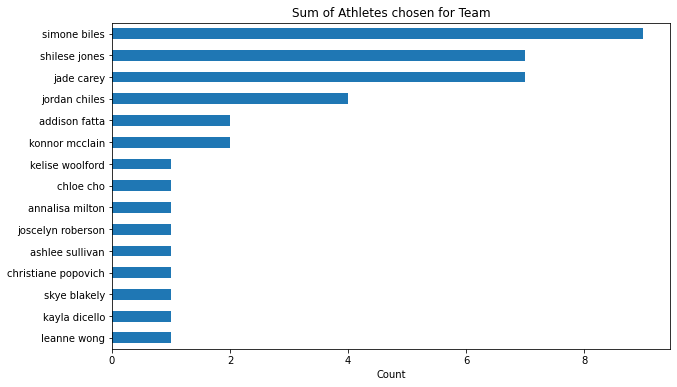

In [52]:
# Flatten the 'Selected Athletes' column
athletes_flat = [athlete for sublist in df['Selected Athletes'] for athlete in sublist]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pd.Series(athletes_flat).value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)

ax.set_xlabel('Count')
ax.set_title('Sum of Athletes chosen for Team')

plt.show()

In [55]:
df = df.sort_values(by='Total Score', ascending=False)

In [56]:
df = df.reset_index(drop=True) 

In [57]:
df

,Algorithm,IAA/Apparatus,Total Score,Selected Athletes,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
0,Variable Neighborhood Search (VNS),IAA,171.470750,"[shilese jones, simone biles, jordan chiles, j...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,Tabu Search,IAA,171.337250,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,Tabu Search,Apparatus,170.798117,"[jade carey, konnor mcclain, shilese jones, si...",0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,brute force,IAA,169.963000,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,Hyper-Heuristics,IAA,169.963000,"[skye blakely, jade carey, shilese jones, simo...",1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
5,brute force,Apparatus,169.120117,"[addison fatta, jade carey, shilese jones, sim...",0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
6,Hyper-Heuristics,Apparatus,166.263283,"[christiane popovich, ashlee sullivan, shilese...",0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
7,Variable Neighborhood Search (VNS),Apparatus,166.038475,"[simone biles, leanne wong, konnor mcclain, ka...",0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
8,Stochastic control,IAA,156.995500,"[jade carey, jordan chiles, joscelyn roberson,...",0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
9,Stochastic control,Apparatus,141.703750,"[addison fatta, annalisa milton, chloe cho, ke...",0,0,0,0,0,1,1,0,1,0,0,1,0,0,0


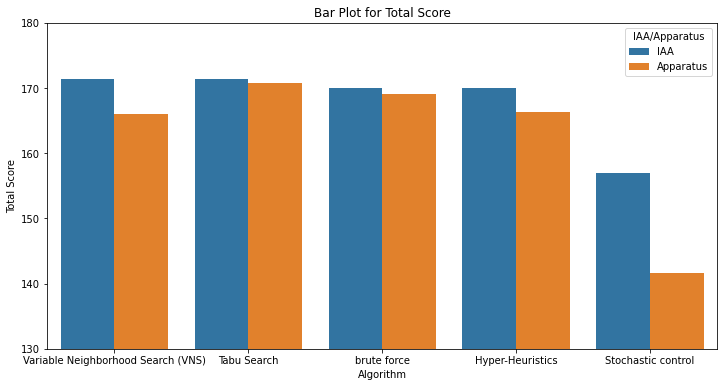

In [59]:
# Bar Plot for Total Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Algorithm', y='Total Score', hue='IAA/Apparatus', data=df)
plt.title('Bar Plot for Total Score')
plt.xlabel('Algorithm')
plt.ylabel('Total Score')

# Set y-axis to start at 150
ax.set_ylim(130, ax.get_ylim()[1])

plt.show()



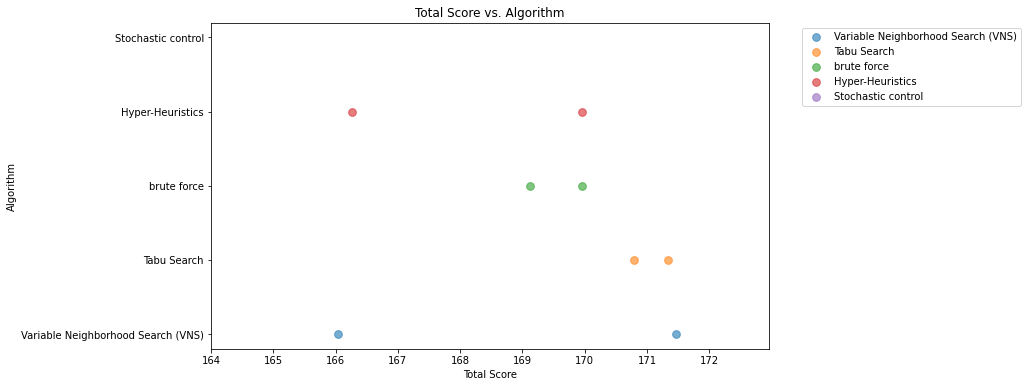

In [70]:
import matplotlib.pyplot as plt

# Bubble Plot
plt.figure(figsize=(10, 6))
for i, algorithm in enumerate(df['Algorithm'].unique()):
    subset = df[df['Algorithm'] == algorithm]
    plt.scatter(subset['Total Score'], subset['Algorithm'], s=len(subset['Selected Athletes']) * 30, alpha=0.6, label=algorithm)

plt.xlabel('Total Score')
plt.ylabel('Algorithm')
plt.title('Total Score vs. Algorithm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlim(164) 

plt.show()

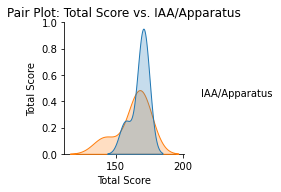

In [61]:
# Pair Plot
sns.pairplot(df, hue='IAA/Apparatus', vars=['Total Score'])
plt.title('Pair Plot: Total Score vs. IAA/Apparatus')
plt.show()

In [62]:
top5=df.iloc[:5]

In [63]:
top5

,Algorithm,IAA/Apparatus,Total Score,Selected Athletes,skye blakely,ashlee sullivan,christiane popovich,kayla dicello,joscelyn roberson,addison fatta,annalisa milton,shilese jones,kelise woolford,konnor mcclain,jordan chiles,chloe cho,jade carey,leanne wong,simone biles
0,Variable Neighborhood Search (VNS),IAA,171.470750,"[shilese jones, simone biles, jordan chiles, j...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,Tabu Search,IAA,171.337250,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,Tabu Search,Apparatus,170.798117,"[jade carey, konnor mcclain, shilese jones, si...",0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,brute force,IAA,169.963000,"[jade carey, jordan chiles, shilese jones, sim...",0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,Hyper-Heuristics,IAA,169.963000,"[skye blakely, jade carey, shilese jones, simo...",1,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [64]:
athletes_series = pd.Series([athlete for athletes_list in top5['Selected Athletes'] for athlete in athletes_list])

# Get the count of each athlete
top5list = athletes_series.value_counts()


In [65]:
top5list

shilese jones     5
simone biles      5
jade carey        5
jordan chiles     3
konnor mcclain    1
skye blakely      1
Name: count, dtype: int64

In [66]:
# import pandas as pd

# data = {
#     'Name': [
#         'Constraint Satisfaction Problem (CSP)',
#         'Hyper - Heuristics',
#         'Stochastic control',
#         'Tabu Search',
#         'Variable Neighborhood Search (VNS)',
#         'brute force',
#         'Sum',
#         'simone biles',
#         'shilese jones',
#         'jade carey',
#         'jordan chiles',
#         'konnor mcclain',
#         'addison fatta',
#         'ashlee sullivan',
#         'chloe cho',
#         'kayla dicello',
#         'skye blakely',
#         'kelise woolford',
#         'joscelyn roberson',
#         'leanne wong',
#         'christiane popovich',
#         'annalisa milton'
#     ],
#     '1': [1, 2, 1, 2, 2, 2, 10, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
#     '2': [2, 2, 0, 2, 1, 2, 8, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
#     '3': [1, 0, 1, 0, 1, 1, 8, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
#     '4': [2, 2, 2, 2, 2, 2, 10, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
#     '5': [2, 1, 1, 1, 1, 0, 6, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#     '6': [2, 2, 2, 1, 2, 1, 10, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
# }

# df = pd.DataFrame(data)

# df


In [74]:
# Updated data without brute-force search
new_data = {
    'Individual_Medal':['ashlee sullivan', 'simone biles','joscelyn roberson',
         'shilese jones', 'zoe miller', 'jordan chiles']}

# Create DataFrame
df = pd.DataFrame(new_data)





In [77]:
df['Medals']=[1, 3, 1, 1, 1, 1]

In [78]:
df

,Individual_Medal,Medals
0,ashlee sullivan,1
1,simone biles,3
2,joscelyn roberson,1
3,shilese jones,1
4,zoe miller,1
5,jordan chiles,1


In [79]:
gymnasts

,Name,Sum
14,simone biles,9
7,shilese jones,7
12,jade carey,7
10,jordan chiles,4
5,addison fatta,2
9,konnor mcclain,2
0,skye blakely,1
1,ashlee sullivan,1
2,christiane popovich,1
3,kayla dicello,1


In [80]:
df = df.rename(columns={'Individual_Medal': 'Name'})

In [81]:
gymnasts = gymnasts.rename(columns={'Sum': 'Team_apperances'})

In [82]:
df

,Name,Medals
0,ashlee sullivan,1
1,simone biles,3
2,joscelyn roberson,1
3,shilese jones,1
4,zoe miller,1
5,jordan chiles,1


In [83]:
gymnasts

,Name,Team_apperances
14,simone biles,9
7,shilese jones,7
12,jade carey,7
10,jordan chiles,4
5,addison fatta,2
9,konnor mcclain,2
0,skye blakely,1
1,ashlee sullivan,1
2,christiane popovich,1
3,kayla dicello,1


In [84]:
combined_df = pd.merge(df, gymnasts, on='Name', how='outer')

# Fill NaN values with 0 for columns that may not have a match in the other DataFrame
combined_df = combined_df.fillna(0)
combined_df

,Name,Medals,Team_apperances
0,ashlee sullivan,1.0,1.0
1,simone biles,3.0,9.0
2,joscelyn roberson,1.0,1.0
3,shilese jones,1.0,7.0
4,zoe miller,1.0,0.0
5,jordan chiles,1.0,4.0
6,jade carey,0.0,7.0
7,addison fatta,0.0,2.0
8,konnor mcclain,0.0,2.0
9,skye blakely,0.0,1.0


In [89]:
combined_df[['Medals', 'Team_apperances']] = combined_df[['Medals', 'Team_apperances']].astype(int)


In [90]:
combined_df

,Name,Medals,Team_apperances
0,ashlee sullivan,1,1
1,simone biles,3,9
2,joscelyn roberson,1,1
3,shilese jones,1,7
4,zoe miller,1,0
5,jordan chiles,1,4
6,jade carey,0,7
7,addison fatta,0,2
8,konnor mcclain,0,2
9,skye blakely,0,1


In [91]:
combined_df = combined_df.sort_values('Team_apperances', ascending=False)

In [92]:
combined_df


,Name,Medals,Team_apperances
1,simone biles,3,9
3,shilese jones,1,7
6,jade carey,0,7
5,jordan chiles,1,4
7,addison fatta,0,2
8,konnor mcclain,0,2
0,ashlee sullivan,1,1
2,joscelyn roberson,1,1
9,skye blakely,0,1
10,christiane popovich,0,1


In [93]:
df = combined_df.sort_values('Medals', ascending=False)

In [94]:
df

,Name,Medals,Team_apperances
1,simone biles,3,9
3,shilese jones,1,7
5,jordan chiles,1,4
0,ashlee sullivan,1,1
2,joscelyn roberson,1,1
4,zoe miller,1,0
6,jade carey,0,7
7,addison fatta,0,2
8,konnor mcclain,0,2
9,skye blakely,0,1
